In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
#from kneed import KneeLocator
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import matplotlib.pyplot as plt
#import psycopg2
import seaborn as sns
import pickle
import os
import sys

In [4]:
Exp_data=pd.read_csv("E:\\10xAccademy_Practice\\Week 1\\Data\\OutlierRemved_telecoData_outliers.csv")
Exp_data.head(5)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,14.416352,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,16.578971,14.732334,15.919515,16.083116,19.443428,16.478853,18.961518,15.991897,17.419642,19.548462
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,14.126741,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,16.823537,16.765813,16.724508,16.661996,20.226918,13.973120,20.082529,16.527230,17.800791,20.297677
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,14.124290,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,16.797431,16.503329,16.682716,15.634140,19.251782,12.888235,19.833356,15.254341,17.143551,19.449612
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,14.094285,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,16.878346,16.533289,16.454185,13.908948,20.499545,16.199650,20.434303,16.364743,17.584222,20.556064
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,13.900779,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,16.540705,16.757994,16.656025,12.936559,20.084052,15.076752,20.126718,16.448142,17.467280,20.159635


In [46]:
df=Exp_data.copy()

In [4]:
df.columns.tolist()

['bearer_id',
 'start',
 'start_ms',
 'end',
 'end_ms',
 'dur._(ms)',
 'imsi',
 'msisdn/number',
 'imei',
 'last_location_name',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'tcp_dl_retrans._vol_(bytes)',
 'tcp_ul_retrans._vol_(bytes)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'http_dl_(bytes)',
 'http_ul_(bytes)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'dur._(ms).1',
 'handset_manufacturer',
 'handset_type',
 'nb_of_sec_with_125000b_<_vol_dl',
 'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
 'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
 'nb_of_sec_with_37500b_<_vol_ul',
 'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
 'nb_of_sec_with_6250b_<_vol_ul_<_37500b',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'socia

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='avg_rtt_ul_(ms)'>

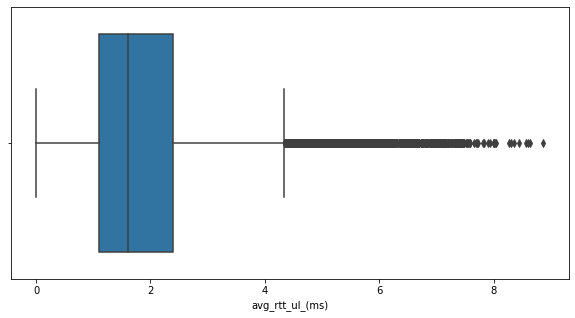

In [93]:
plt.figure(figsize=(10,5))
sns.boxplot(df["avg_rtt_ul_(ms)"], orient="vert")

# Load Both Engagement and Experiance Analysis data 

In [6]:
# Import user experience data
user_exp = pd.read_csv('E:\\10xAccademy_Practice\\Week 1\\User Experiance Analysis\\Processed_Data\\UserExperiance_data.csv')
# Import user engagement data
user_eng = pd.read_csv('E:\\10xAccademy_Practice\\Week 1\\User Engagement Analysis\\Processed_Data\\UserEngagement_data.csv')
user_eng

,msisdn/number,cluster,session_id,dur._(ms),Total_Data
0,3.360100e+10,0,1,11.667533,37.952551
1,3.360100e+10,1,1,12.107522,36.011203
2,3.360100e+10,0,1,11.812800,37.624373
3,3.360101e+10,0,1,10.817335,36.639432
4,3.360101e+10,2,2,19.656666,75.943057
...,...,...,...,...,...
106850,3.379000e+10,2,1,9.083643,37.449980
106851,3.379000e+10,1,1,11.856430,37.304194
106852,3.197020e+12,1,1,13.684701,36.522022
106853,3.370000e+14,1,1,12.441263,37.958856


In [151]:
user_eng.duplicated().sum()

0

In [140]:
user_exp.drop([106855], axis=0, inplace=True)
user_exp.head(5)

,msisdn/number,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total
0,3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031
1,3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031
2,3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031
3,3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539
4,3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729


In [8]:
with open("E:\\10xAccademy_Practice\\Week 1\\User Engagement Analysis\\K_Means Model\\UserEngagement_KNN_Model.pkl", "rb") as f:
    kmeans_eng = pickle.load(f)
    
with open("E:\\10xAccademy_Practice\\Week 1\\User Experiance Analysis\\K-Means Model\\UserExperiance_K-Means_Model.pkl", "rb") as f:
    kmeans_exp = pickle.load(f)

c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator KMeans from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [114]:
with open("E:\\10xAccademy_Practice\\Week 1\\User Experiance Analysis\\K-Means Model\\UserExperiance_K-Means_Model.pkl", "rb") as f:
    kmeans_Experiance = pickle.load(f)
    
with open("E:\\10xAccademy_Practice\\Week 1\\User Engagement Analysis\\K_Means Model\\UserEngagement_KNN_Model.pkl", "rb") as f:
    kmeans_Engagement = pickle.load(f)


In [11]:
user_eng_df = user_eng.set_index('msisdn/number')[
    ['session_id','dur._(ms)', 'Total_Data']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(user_eng_df)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.488567,-0.435768,-0.463579
1,-0.488567,-0.389114,-0.528306
2,-0.488567,-0.420365,-0.474521
3,-0.488567,-0.525918,-0.507360
4,0.752095,0.411355,0.803074


In [12]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.609047,-0.543228,-0.577897
1,-0.597230,-0.475658,-0.645807
2,-0.610435,-0.525221,-0.592885
3,-0.555800,-0.598291,-0.577178
4,0.640275,0.350195,0.683674


# Calculate the distance

In [15]:
distance = kmeans_eng.fit_transform(data_normalized)
distance_from_less_engagement = list(
    map(lambda x: x[3], distance))
user_eng['engagement_score'] = distance_from_less_engagement
user_eng.head(5)

c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


,msisdn/number,cluster,session_id,dur._(ms),Total_Data,engagement_score
0,3.360100e+10,0,1,11.667533,37.952551,1.995702
1,3.360100e+10,1,1,12.107522,36.011203,1.998720
2,3.360100e+10,0,1,11.812800,37.624373,1.996958
3,3.360101e+10,0,1,10.817335,36.639432,1.990648
4,3.360101e+10,2,2,19.656666,75.943057,0.100884


In [16]:
len(user_eng)

106855

In [124]:
User_Exaperiance_Data_DF = User_Exaperiance_Data.copy()
#User_Exaperiance_Data.drop([106855], axis=0, inplace=True)
User_Exaperiance_Data_DF

,msisdn/number,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total
0,3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031
1,3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031
2,3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031
3,3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539
4,3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729
...,...,...,...,...,...,...,...
106850,3.378998e+10,0,11.874439,28.221172,37.334416,28.221172,37.334416
106851,3.379000e+10,0,6.040255,15.166563,20.285299,15.166563,20.285299
106852,3.379000e+10,1,5.318120,8.090709,23.201031,8.090709,23.201031
106853,3.200000e+12,2,5.416100,16.089721,23.201031,16.089721,23.201031


In [19]:
user_expr = user_exp.copy()
user_expr.drop([106855], axis=0, inplace=True)

In [20]:
exp_df = user_expr.set_index('msisdn/number')
distance = kmeans_exp.fit_transform(data_normalized)
distance_from_worest_experiance = list(
    map(lambda x: x[0], distance))
user_expr['experience_score'] = distance_from_worest_experiance
user_expr.head(5)


c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


,msisdn/number,cluster,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total,experience_score
0,3.360100e+10,1,8.114390,7.274480,23.201031,7.274480,23.201031,1.996163
1,3.360100e+10,1,3.401197,7.803027,23.201031,7.803027,23.201031,1.993855
2,3.360100e+10,1,5.416100,7.763021,23.201031,7.763021,23.201031,1.995968
3,3.360101e+10,2,6.942157,9.102310,16.921539,9.102310,16.921539,1.995601
4,3.360101e+10,2,8.114390,27.135851,49.213729,27.135851,49.213729,0.232649


# Engagement and Experiance

In [21]:
user_eng_id = user_eng['msisdn/number'].values
user_expr_id = user_expr['msisdn/number'].values
user_intersection = list(
    set(user_eng_id).intersection(user_expr_id))
user_intersection[:5]

[33662697474.0, 33665581058.0, 33628094468.0, 33666105351.0, 33782497288.0]

In [22]:
user_eng_df = user_eng[user_eng['msisdn/number'].isin(
    user_intersection)]

In [25]:
user_eng_df.shape

(106853, 6)

In [23]:
user_exper_df = user_expr[user_expr['msisdn/number'].isin(
    user_intersection)]

In [24]:
user_exper_df.shape

(106853, 8)

In [132]:
# Calulate the satisfaction score for each customer based on engagement & experience score

In [26]:
user_df = pd.merge(user_eng_df, user_exper_df, on='msisdn/number')
user_df['satisfaction_score'] = (
    user_df['engagement_score'] + user_df['experience_score'])/2
user_df.head(5)

,msisdn/number,cluster_x,session_id,dur._(ms),Total_Data,engagement_score,cluster_y,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total,experience_score,satisfaction_score
0,3.360100e+10,0,1,11.667533,37.952551,1.995702,1,8.114390,7.274480,23.201031,7.274480,23.201031,1.996163,1.995932
1,3.360100e+10,1,1,12.107522,36.011203,1.998720,1,3.401197,7.803027,23.201031,7.803027,23.201031,1.993855,1.996288
2,3.360100e+10,0,1,11.812800,37.624373,1.996958,1,5.416100,7.763021,23.201031,7.763021,23.201031,1.995968,1.996463
3,3.360101e+10,0,1,10.817335,36.639432,1.990648,2,6.942157,9.102310,16.921539,9.102310,16.921539,1.995601,1.993125
4,3.360101e+10,2,2,19.656666,75.943057,0.100884,2,8.114390,27.135851,49.213729,27.135851,49.213729,0.232649,0.166766


In [27]:
satisfaction_df = user_df[['msisdn/number', 'engagement_score',
                        'experience_score', 'satisfaction_score']]
satisfaction_df = satisfaction_df.set_index('msisdn/number')

In [28]:
top_10_satisfaction = satisfaction_df.nlargest(10, 'satisfaction_score')
top_10_satisfaction.head(10)

,engagement_score,experience_score,satisfaction_score
msisdn/number,,,
3.369912e+10,1.999411,1.996328,1.997869
3.366655e+10,1.999407,1.996326,1.997866
3.366923e+10,1.999405,1.996320,1.997863
3.366634e+10,1.999423,1.996295,1.997859
3.369817e+10,1.999390,1.996320,1.997855
3.366517e+10,1.999376,1.996328,1.997852
3.366702e+10,1.999376,1.996328,1.997852
3.376009e+10,1.999374,1.996325,1.997850
3.366961e+10,1.999404,1.996292,1.997848


# Plot Each Score

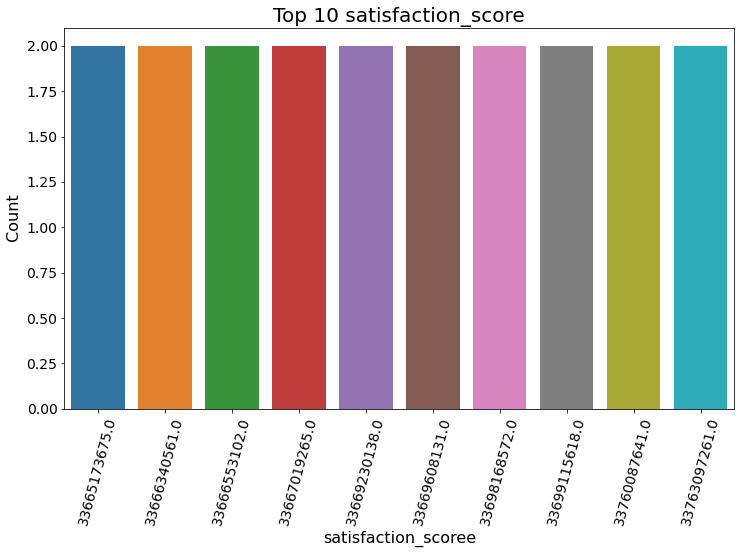

In [30]:
#pl.plot_bar(top_10_satisfaction, top_10_satisfaction.index, top_10_satisfaction['satisfaction_score'], "Top 10 user satisfaction score", "Users", "Satisfaction Score")

top_10_satisfaction.nlargest(10, 'satisfaction_score')
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_satisfaction, x=top_10_satisfaction.index, y=top_10_satisfaction.satisfaction_score)
plt.title("Top 10 satisfaction_score", size=20)
plt.xticks(rotation=75, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("satisfaction_scoree", fontsize=16)
plt.ylabel(" Count ", fontsize=16)

plt.show()




In [ ]:
#Build a regression model of your choice to predict the satisfaction score of a customer. 

In [31]:
class Model:
    def __init__(self,X_train,X_test,y_train,y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test


    def model(self):
        self.trained_model = LinearRegression()
        self.trained_model.fit(self.X_train, self.y_train)
        

    def predict(self):
        self.model()
        return self.trained_model.predict(self.X_test)

    def score(self):
        return self.trained_model.score(self.X_test, self.y_test)

    def error_score(self):
        return np.mean((self.trained_model.predict(self.X_test) - self.y_test) ** 2)
    
    def save_model(self, path):
        pickle.dump(self.trained_model, open(path, 'wb'))

In [33]:
X = satisfaction_df[['engagement_score', 'experience_score']]
Y = satisfaction_df[['satisfaction_score']]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

In [74]:
model = Model(X_train, X_test, y_train, y_test)
nn=model.predict()
nn

array([[1.00071862],
       [1.99312039],
       [1.00918755],
       ...,
       [1.05847275],
       [0.06754668],
       [1.98626586]])

In [35]:
model.score()

1.0

In [36]:
model.error_score()

c:\users\hb\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


satisfaction_score    2.598080e-31
dtype: float64

In [37]:
model.save_model("E:\\10xAccademy_Practice\\Week 1\\User Engagement Analysis\\K_Means Model\\User_Satisfaction_KMeans_Model.pkl")

In [38]:
user_df.head()

,msisdn/number,cluster_x,session_id,dur._(ms),Total_Data,engagement_score,cluster_y,avg_rtt_total,avg_bearer_tp_total,avg_tcp_retrans_total,avg_tp_total,total_avg_tcp_total,experience_score,satisfaction_score
0,3.360100e+10,0,1,11.667533,37.952551,1.995702,1,8.114390,7.274480,23.201031,7.274480,23.201031,1.996163,1.995932
1,3.360100e+10,1,1,12.107522,36.011203,1.998720,1,3.401197,7.803027,23.201031,7.803027,23.201031,1.993855,1.996288
2,3.360100e+10,0,1,11.812800,37.624373,1.996958,1,5.416100,7.763021,23.201031,7.763021,23.201031,1.995968,1.996463
3,3.360101e+10,0,1,10.817335,36.639432,1.990648,2,6.942157,9.102310,16.921539,9.102310,16.921539,1.995601,1.993125
4,3.360101e+10,2,2,19.656666,75.943057,0.100884,2,8.114390,27.135851,49.213729,27.135851,49.213729,0.232649,0.166766


In [55]:
user_satisfaction_df = user_df[[
    'msisdn/number', 
    'engagement_score',
    'experience_score',
'satisfaction_score']]
user_satisfaction_df = user_satisfaction_df.set_index('msisdn/number')

In [56]:
user_satisfaction_df.head()

,engagement_score,experience_score,satisfaction_score
msisdn/number,,,
3.360100e+10,1.995702,1.996163,1.995932
3.360100e+10,1.998720,1.993855,1.996288
3.360100e+10,1.996958,1.995968,1.996463
3.360101e+10,1.990648,1.995601,1.993125
3.360101e+10,0.100884,0.232649,0.166766


In [57]:
from sklearn.preprocessing import Normalizer

def normalizer(df, columns):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

In [58]:
user_satisfaction_df

,engagement_score,experience_score,satisfaction_score
msisdn/number,,,
3.360100e+10,1.995702,1.996163,1.995932
3.360100e+10,1.998720,1.993855,1.996288
3.360100e+10,1.996958,1.995968,1.996463
3.360101e+10,1.990648,1.995601,1.993125
3.360101e+10,0.100884,0.232649,0.166766
...,...,...,...
3.378997e+10,1.998390,0.007530,1.002960
3.378998e+10,0.130724,1.984956,1.057840
3.379000e+10,1.969124,1.995799,1.982462


In [60]:
normalized_df = normalizer(user_satisfaction_df, ['engagement_score', 'experience_score','satisfaction_score'] )

In [61]:
normalized_sat_df = normalized_df.copy()

In [62]:
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(normalized_sat_df)
centroids = kmeans.cluster_centers_

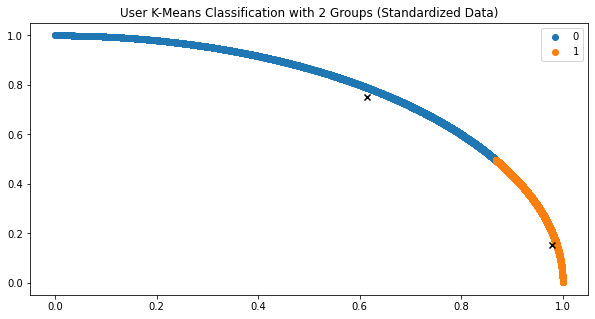

In [46]:
lables_unique = np.unique(label)
#plotting the results:
plt.figure(figsize=(10,5))
plt.title('User K-Means Classification with 2 Groups (Standardized Data)')
for i in lables_unique:
    plt.scatter(normalized_sat_df[label == i].iloc[:,0] , normalized_sat_df[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1], marker='x', color = 'black')
plt.legend()
plt.show()

In [63]:
normalized_sat_df.head()

,engagement_score,experience_score,satisfaction_score
0,0.577284,0.577417,0.577350
1,0.578054,0.576646,0.577350
2,0.577493,0.577207,0.577350
3,0.576633,0.578067,0.577350
4,0.332398,0.766545,0.549472


In [64]:
u_sat_eng = user_satisfaction_df.copy()

In [65]:
u_sat_eng.insert(0, 'cluster', kmeans.labels_)
u_sat_eng.head(5)

,cluster,engagement_score,experience_score,satisfaction_score
msisdn/number,,,,
3.360100e+10,1,1.995702,1.996163,1.995932
3.360100e+10,1,1.998720,1.993855,1.996288
3.360100e+10,1,1.996958,1.995968,1.996463
3.360101e+10,1,1.990648,1.995601,1.993125
3.360101e+10,1,0.100884,0.232649,0.166766


In [66]:
u_sat_eng.to_csv('E:\\10xAccademy_Practice\\Week 1\\User Experiance Analysis\\Processed_Data\\UserSatisfaction_data.csv')

In [83]:
agg_sat = u_sat_eng.groupby('cluster').agg(
    {'engagement_score': 'sum', 'experience_score': 'sum','satisfaction_score':'sum'})

In [87]:
agg_sat_df = pd.DataFrame()
agg_sat_df['cluster'] = agg_sat.index
agg_sat_df['engagement_score'] = agg_sat['engagement_score']
agg_sat_df['experience_score'] = agg_sat['experience_score']
agg_sat_df['satisfaction_score'] = agg_sat['satisfaction_score']


In [88]:
agg_sat_df.head()

,cluster,engagement_score,experience_score,satisfaction_score
0,0,23284.557158,1316.487552,12300.522355
1,1,135879.367089,155638.630337,145758.998713


<AxesSubplot:xlabel='cluster', ylabel='satisfaction_score'>

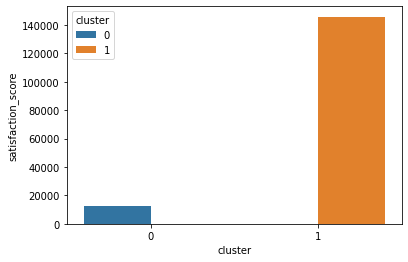

In [70]:
sns.barplot(x="cluster", y="satisfaction_score", hue="cluster", data=agg_sat_df)

<AxesSubplot:xlabel='cluster', ylabel='experience_score'>

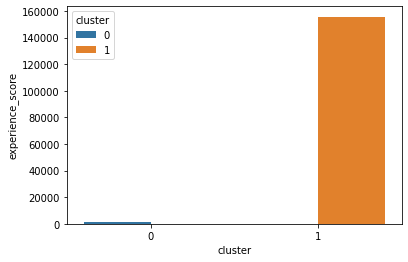

In [71]:
sns.barplot(x="cluster", y="experience_score", hue="cluster", data=agg_sat_df)

<AxesSubplot:xlabel='cluster', ylabel='engagement_score'>

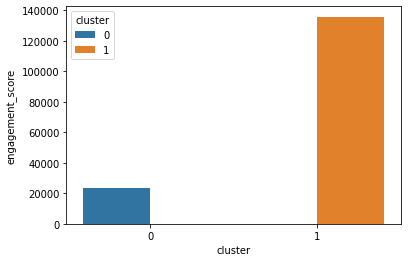

In [72]:
sns.barplot(x="cluster", y="engagement_score", hue="cluster", data=agg_sat_df)

# Mysql Database 

In [114]:
import mysql.connector
import mysql

connection = mysql.connector.connect(host='localhost',
                                         database='Telecom',
                                         user='root',
                                         password='1234')  
def DBConnect(dbName=None):
   
    conn = mysql.connector.connect(host='localhost', user='root', password="1234",
                         database=dbName, buffered=True)
    cur = conn.cursor()
    return conn, cur
def insert_to_tweet_table(dbName: str, agg_sat_df: pd.DataFrame, table_name: str) -> None:
   
    conn, cur = DBConnect(dbName)
    for _, row in agg_sat_df.iterrows():
        sqlQuery = f"""INSERT INTO {table_name} (cluster,engagement_score, experience_score,satisfaction_score)
             VALUES(%s, %s, %s, %s);"""
        data = (row[0], row[1], row[2], row[3])
        print(row)

        try:
            # Execute the SQL command
            cur.execute(sqlQuery, data)
            # Commit your changes in the database
            conn.commit()
            print("Data Inserted Successfully")
        except Exception as e:
            conn.rollback()
            print("Error: ", e)
    return
    
         
insert_to_tweet_table("Telecom",agg_sat_df,"satisfactionData2")


cluster                   0.000000
engagement_score      23284.557158
experience_score       1316.487552
satisfaction_score    12300.522355
Name: 0, dtype: float64
Data Inserted Successfully
cluster                    1.000000
engagement_score      135879.367089
experience_score      155638.630337
satisfaction_score    145758.998713
Name: 1, dtype: float64
Data Inserted Successfully


In [115]:
import mysql.connector

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='Telecom',
                                         user='root',
                                         password='1234')

    sql_select_Query = "select * from satisfactionData2"
    cursor = connection.cursor()
    cursor.execute(sql_select_Query)
    # get all records
    records = cursor.fetchall()
    print("Total number of rows in table: ", cursor.rowcount)

    print("\nPrinting each row")
    for row in records:
        
        print("satisfaction data = ", row[0])
        print("Engagement data  = ", row[1])
        print("Experiance Data  = ", row[2], "\n")
        print("Cluster Category  = ", row[3], "\n")

except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if connection.is_connected():
        connection.close()
        cursor.close()
        print("MySQL connection is closed")

Total number of rows in table:  2

Printing each row
satisfaction data =  0.0
Engagement data  =  23284.557157737214
Experiance Data  =  12300.522354652705 

Cluster Category  =  1316.4875515681993 

satisfaction data =  1.0
Engagement data  =  135879.36708884683
Experiance Data  =  145758.99871275853 

Cluster Category  =  155638.63033667023 

MySQL connection is closed
